In [4]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display



In [5]:
df_final=pd.read_csv('/Users/annelahann/neue-fische/RiffRefine/data/data_cleaned.csv')
df_final.head()


,Unnamed: 0,track_id,album_comments,album_date_created,album_favorites,album_id,album_listens,album_title,album_tracks,album_type,...,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01,album_information_bin,artist_bio_bin,artist_website_bin
0,0,2,0,2008-11-26 01:44:45,4,1,6073,AWOL - A Way Of Life,7,Album,...,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448,1,1,1
1,1,5,0,2008-11-26 01:44:45,4,1,6073,AWOL - A Way Of Life,7,Album,...,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861,1,1,1
2,2,10,0,2008-11-26 01:45:08,4,6,47632,Constant Hitmaker,2,Album,...,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800,0,1,1
3,3,140,1,2008-11-26 01:49:59,1,61,1300,The Blind Spot,1,Album,...,11.052547,0.379395,0.052379,0.036621,0.001953,3.143968,0.057712,1,1,1
4,4,141,0,2008-11-26 01:49:57,1,60,1304,Every Man For Himself,2,Album,...,32.994659,0.415527,0.040267,0.034668,0.002930,4.204097,0.028665,1,1,1


In [6]:
for col in df_final.columns:
    print(col)

Unnamed: 0
track_id
album_comments
album_date_created
album_favorites
album_id
album_listens
album_title
album_tracks
album_type
artist_comments
artist_date_created
artist_favorites
artist_id
artist_name
artist_tags
set_split
set_subset
track_bit_rate
track_comments
track_date_created
track_duration
track_favorites
track_genre_top
track_genres
track_genres_all
track_interest
track_license
track_listens
track_number
track_tags
track_title
chroma_cens_kurtosis_01
chroma_cens_kurtosis_02
chroma_cens_kurtosis_03
chroma_cens_kurtosis_04
chroma_cens_kurtosis_05
chroma_cens_kurtosis_06
chroma_cens_kurtosis_07
chroma_cens_kurtosis_08
chroma_cens_kurtosis_09
chroma_cens_kurtosis_10
chroma_cens_kurtosis_11
chroma_cens_kurtosis_12
chroma_cens_max_01
chroma_cens_max_02
chroma_cens_max_03
chroma_cens_max_04
chroma_cens_max_05
chroma_cens_max_06
chroma_cens_max_07
chroma_cens_max_08
chroma_cens_max_09
chroma_cens_max_10
chroma_cens_max_11
chroma_cens_max_12
chroma_cens_mean_01
chroma_cens_mean_02
ch

In [34]:
df_final['track_listens'].describe()
df_final_15['track_listens'].describe()

df_final['listens_incl_bonus'].describe()

count      203.000000
mean      3151.600985
std       3439.291235
min        564.000000
25%       1274.500000
50%       2199.000000
75%       3883.500000
max      40244.000000
Name: listens_incl_bonus, dtype: float64

In [35]:
df_final['track_interest'].describe()
df_final_25['track_interest'].describe()

count     7743.000000
mean      4907.045590
std       4428.444677
min        463.000000
25%       1832.000000
50%       3378.000000
75%       6311.000000
max      24996.000000
Name: track_interest, dtype: float64

<Axes: xlabel='months_life', ylabel='Count'>

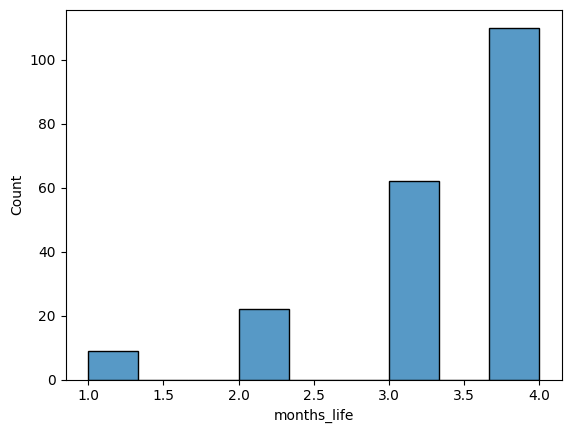

In [10]:
df_final['track_date_created'] = pd.to_datetime(df_final['track_date_created'])
target_date = pd.to_datetime('2017-04-01')
df_final['days_life'] = (target_date - df_final['track_date_created']).dt.days
df_final['months_life'] = ((target_date.year - df_final['track_date_created'].dt.year) * 12 +
                          (target_date.month - df_final['track_date_created'].dt.month))

#sns.histplot(data=df_final,x='days_life')
sns.histplot(data=df_final[df_final['months_life']<5],x='months_life')

<Axes: xlabel='months_life', ylabel='track_listens'>

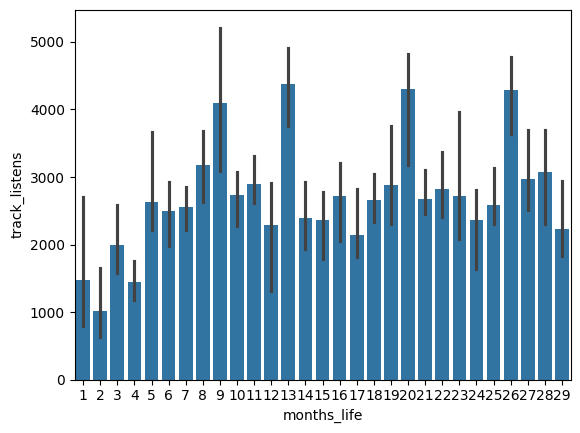

In [11]:
df_final.groupby('months_life')['track_listens'].median()
sns.barplot(data=df_final[df_final['months_life']<30],x='months_life',y='track_listens',estimator='median')

In [12]:
df_final['listens_month']=df_final['track_listens']/df_final['months_life']
df_final[df_final['months_life']<20].groupby('months_life')['listens_month'].median()
#sns.barplot(data=df_final[df_final['months_life']<20],x='months_life',y='listens_month',estimator='median')
df_final[df_final['months_life']==1]['listens_month'].describe()
df_final[df_final['months_life']==2]['listens_month'].describe()
df_final[df_final['months_life']==3]['listens_month'].describe()
df_final[df_final['months_life']==4]['listens_month'].describe()
df_final[df_final['months_life']==5]['listens_month'].describe()
df_final[df_final['months_life']==1]['track_listens'].describe()
df_final[df_final['months_life']==2]['track_listens'].describe()
df_final[df_final['months_life']==3]['track_listens'].describe()
df_final[df_final['months_life']==4]['track_listens'].describe()

count      110.000000
mean      2459.500000
std       3955.260765
min        406.000000
25%        868.250000
50%       1441.500000
75%       2742.750000
max      39359.000000
Name: track_listens, dtype: float64

<Axes: xlabel='months_life', ylabel='bonus_listens'>

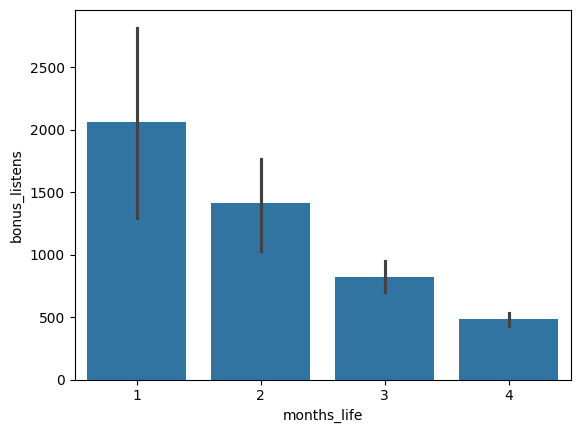

In [13]:
# Calculation bonus_listens

def calculate_bonus(row):
    if row['months_life'] == 1:
        if row['track_listens'] < 1312:
            return 168 + 157 + 102 + 158
        elif 1312 <= row['track_listens'] < 1474:
            return 280 + 432 + 217 + 338
        elif 1474 <= row['track_listens'] < 1835:
            return 511 + 664 + 360 + 527
        else:
            return 938 + 1070 + 686 + 885
    elif row['months_life'] == 2:
        if row['track_listens'] < 561:
            return 157 + 102 + 158
        elif 561 <= row['track_listens'] < 1023:
            return 432 + 217 + 338
        elif 1023 <= row['track_listens'] < 1875:
            return 664 + 360 + 527
        else:
            return 1070 + 686 + 885
    elif row['months_life'] == 3:
        if row['track_listens'] < 1296:
            return 102 + 158
        elif 1296 <= row['track_listens'] < 1994:
            return 217 + 338
        elif 1994 <= row['track_listens'] < 3209:
            return 360 + 527
        else:
            return 686 + 885
    elif row['months_life'] == 4:
        if row['track_listens'] < 868:
            return 158
        elif 868 <= row['track_listens'] < 1441:
            return 338
        elif 1441 <= row['track_listens'] < 2702:
            return 527
        else:
            return 885

df_final['bonus_listens'] = df_final.apply(calculate_bonus, axis=1)

df_final['listens_incl_bonus']=df_final['track_listens']+df_final['bonus_listens']

df_final.groupby('months_life')['bonus_listens'].describe()
sns.barplot(data=df_final[df_final['months_life']<5],x='months_life',y='bonus_listens',estimator='mean')


<Axes: xlabel='listens_log', ylabel='Count'>

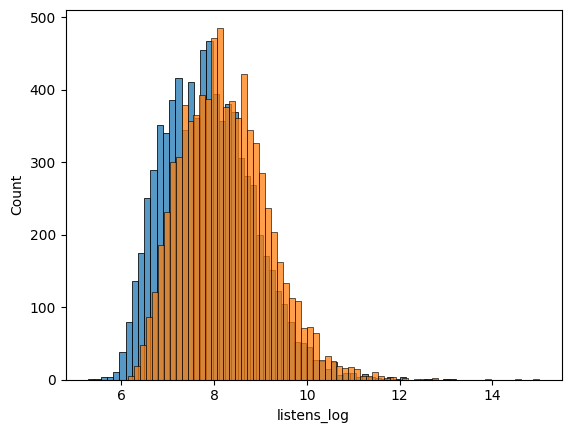

In [14]:
df_final['listens_log']=np.log1p(df_final['track_listens'])
sns.histplot(data=df_final,x='listens_log')
df_final['interest_log']=np.log1p(df_final['track_interest'])
sns.histplot(data=df_final,x='interest_log')


In [15]:
df_final['combi']=df_final['track_listens']/df_final['track_interest']
df_final['pop_score']=df_final['combi']*df_final['track_listens']
#df_final['pop_score']=(df_final['track_listens']/df_final['track_listens'].max())+(df_final['track_interest']/df_final['track_interest'].max())
#sns.histplot(data=df_final,x='pop_score')

In [16]:
df_final.groupby('track_genre_top')['combi'].mean()

track_genre_top
Electronic       0.743556
Experimental     0.694351
Folk             0.691896
Hip-Hop          0.708564
Instrumental     0.786216
International    0.693141
Pop              0.707419
Rock             0.770957
Name: combi, dtype: float64

<Axes: xlabel='track_listens', ylabel='Count'>

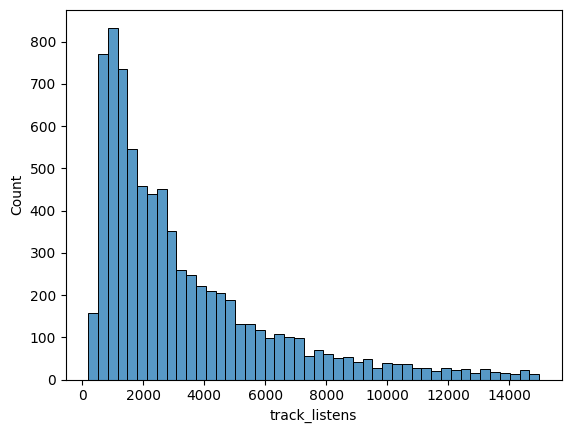

In [17]:
df_final_15 = df_final[df_final['track_listens']<15000]
sns.histplot(data=df_final_15,x='track_listens')

<Axes: xlabel='track_interest', ylabel='Count'>

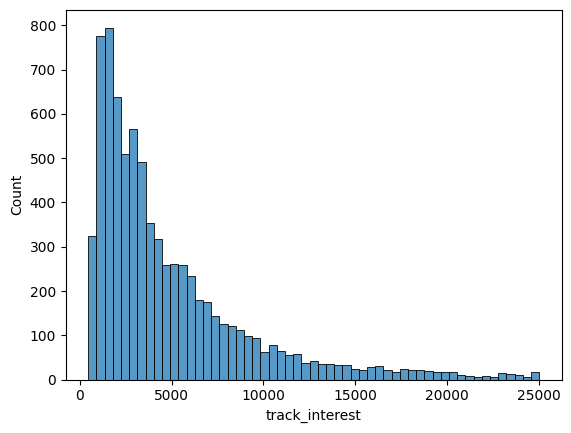

In [18]:
df_final_25 = df_final[df_final['track_interest']<25000]
sns.histplot(data=df_final_25,x='track_interest')

In [19]:
#df_final['listens_bins'] = pd.qcut(df_final['track_listens'], q=5,labels=range(1,6))
#df_final['listens_bins'].value_counts()

df_final['interest_bins'] = pd.qcut(df_final['track_interest'], q=5,labels=range(1,6))
df_final['interest_bins'].value_counts()

interest_bins
1    1603
4    1602
3    1600
5    1598
2    1597
Name: count, dtype: int64

In [20]:
# create 5 bins for listens with customized edges
custom_bins = [0, 1000, 2000, 3000, 5000, float('inf')]
df_final['listens_bins'] = pd.cut(df_final['track_listens'], bins=custom_bins, labels=range(1,6))
df_final['listens_bins'].value_counts()

listens_bins
5    1943
2    1937
4    1407
1    1385
3    1328
Name: count, dtype: int64

In [21]:
# create 5 bins for interest with customized edges
custom_bins = [0, 1500, 3000, 4500, 8000, float('inf')]
df_final['interest_bins'] = pd.cut(df_final['track_interest'], bins=custom_bins, labels=range(1,6))
df_final['interest_bins'].value_counts()

interest_bins
2    2070
4    1609
5    1605
3    1361
1    1355
Name: count, dtype: int64

In [22]:
# create 5 bins for pop_score with equal groups
df_final['pop_bins'] = pd.qcut(df_final['pop_score'], q=5, labels=range(1,6))
df_final['pop_bins'].value_counts()

pop_bins
1    1600
2    1600
3    1600
4    1600
5    1600
Name: count, dtype: int64

In [23]:
#results, bin_edges= pd.qcut(df_final['track_listens'], q=5,retbins=True)
#print(bin_edges)

results, bin_edges= pd.qcut(df_final['pop_score'], q=5,retbins=True)
print(bin_edges)

[5.78939092e+00 7.23362669e+02 1.35107739e+03 2.42415938e+03
 4.49848586e+03 1.93494340e+05]


In [24]:
pd.crosstab(df_final['track_genre_top'],df_final['interest_bins'])

interest_bins,1,2,3,4,5
track_genre_top,,,,,
Electronic,0,0,0,372,628
Experimental,248,435,152,102,63
Folk,383,360,113,91,53
Hip-Hop,25,404,245,207,119
Instrumental,0,163,215,298,324
International,323,226,132,165,154
Pop,376,375,122,72,55
Rock,0,107,382,302,209


In [25]:
pd.crosstab(df_final['track_genre_top'],df_final['pop_bins'])

pop_bins,1,2,3,4,5
track_genre_top,,,,,
Electronic,3,6,35,342,614
Experimental,286,387,177,95,55
Folk,417,314,161,69,39
Hip-Hop,107,315,294,164,120
Instrumental,12,48,241,352,347
International,345,227,171,126,131
Pop,414,259,176,89,62
Rock,16,44,345,363,232


In [26]:
print(df_final['track_genre_top'].dtype)
print(df_final['listens_bins'].dtype)
df_final['track_genre_top'] = df_final['track_genre_top'].astype('category')

object
category


In [28]:
# Baseline model genre mapping
genre_mapping = {
    'Rock': 4,
    'Pop': 1,
    'Folk': 1,
    'Hip-Hop': 3,
    'Instrumental': 5,
    'Electronic': 5,
    'Experimental': 2,
    'International': 2}

genre_mapping1 = {
    'Rock': 4,
    'Pop': 2,
    'Folk': 1,
    'Hip-Hop': 3,
    'Instrumental': 5,
    'Electronic': 5,
    'Experimental': 2,
    'International': 1}

genre_mapping2 = {
    'Rock': 4,
    'Pop': 1,
    'Folk': 2,
    'Hip-Hop': 3,
    'Instrumental': 5,
    'Electronic': 5,
    'Experimental': 1,
    'International': 2}
    
df_final['genre_pred'] = df_final['track_genre_top'].replace(genre_mapping)
df_final['genre_pred1'] = df_final['track_genre_top'].replace(genre_mapping1)
df_final['genre_pred2'] = df_final['track_genre_top'].replace(genre_mapping2)




In [29]:
df_final['genre_pred'] = df_final['genre_pred'].astype('int')
df_final['genre_pred1'] = df_final['genre_pred1'].astype('int')
df_final['genre_pred2'] = df_final['genre_pred2'].astype('int')

In [30]:
pd.crosstab(df_final['genre_pred'],df_final['listens_bins'])

listens_bins,1,2,3,4,5
genre_pred,,,,,
1,801,697,223,156,123
2,575,694,276,220,235
3,9,453,226,168,144
4,0,10,383,337,270
5,0,83,220,526,1171


In [31]:
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score

y_pred = df_final['genre_pred']
y_true = df_final['listens_bins']

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

print(cohen_kappa_score(y_true, y_pred))

[[ 801  575    9    0    0]
 [ 697  694  453   10   83]
 [ 223  276  226  383  220]
 [ 156  220  168  337  526]
 [ 123  235  144  270 1171]]
              precision    recall  f1-score   support

           1       0.40      0.58      0.47      1385
           2       0.35      0.36      0.35      1937
           3       0.23      0.17      0.19      1328
           4       0.34      0.24      0.28      1407
           5       0.59      0.60      0.59      1943

    accuracy                           0.40      8000
   macro avg       0.38      0.39      0.38      8000
weighted avg       0.39      0.40      0.39      8000

0.24769882723957815


In [32]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = df_final['genre_pred1']
y_true = df_final['interest_bins']

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

print(cohen_kappa_score(y_true, y_pred))

[[706 624  25   0   0]
 [586 810 404 107 163]
 [245 274 245 382 215]
 [256 174 207 302 670]
 [207 118 119 209 952]]
              precision    recall  f1-score   support

           1       0.35      0.52      0.42      1355
           2       0.41      0.39      0.40      2070
           3       0.24      0.18      0.21      1361
           4       0.30      0.19      0.23      1609
           5       0.48      0.59      0.53      1605

    accuracy                           0.38      8000
   macro avg       0.36      0.37      0.36      8000
weighted avg       0.36      0.38      0.36      8000

0.2175789680204041


In [33]:
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score

y_pred = df_final['genre_pred']
y_true = df_final['pop_bins']

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

print(cohen_kappa_score(y_true, y_pred))

[[831 631 107  16  15]
 [573 614 315  44  54]
 [337 348 294 345 276]
 [158 221 164 363 694]
 [101 186 120 232 961]]
              precision    recall  f1-score   support

           1       0.42      0.52      0.46      1600
           2       0.31      0.38      0.34      1600
           3       0.29      0.18      0.23      1600
           4       0.36      0.23      0.28      1600
           5       0.48      0.60      0.53      1600

    accuracy                           0.38      8000
   macro avg       0.37      0.38      0.37      8000
weighted avg       0.37      0.38      0.37      8000

0.22859375000000004
